In [4]:
import numpy as np
from scipy.sparse import *
from scipy.linalg import lapack, eigvals_banded, eig_banded
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

## Задание 4 
# Решение граничной задачи для одномерного уравнения Шредингера описывающего связанные состояния электрона в прямоугольной потенциальной квантовой яме конечной высоты (100 мэВ)
## Константы и параметры сетки
Здесь задаются все требуемые при расчете постоянные и коэффициенты перевода из $erg$ в $eV$ и обратно. В расчете используется симметричная сетка с $10000$ узлами на диапазоне $[-300, 300]$ $nm$. 

In [5]:
eV_to_erg = 1.6021766208e-12
erg_to_meV = 1000/eV_to_erg 
V0 = 0.1 #eV
V0 = V0*eV_to_erg #erg
Lnet = np.linspace(1, 100, 100) #nm
m0 = 9.10938356e-28 #g
me = 0.067 * m0
hp = 1.054571800e-27 #erg*s

N = 10000
xmax = 300

## Вспомогательные функции
Здесь задаются следующие функции:
* `get_H` - возвращает диагональ и вторую диагональ дискретного гамильтониана в виде лент.
* `get_lower_egenvalues` - рассчитывает наименьшие собственные значения для ленточной матрицы.
* `get_lower_egenvalues_and_vectors` - рассчитывает собственные вектора и значения для ленточной матрицы.

In [6]:
def get_H(L, N, xmax):
    h = (2*xmax/(N-1))
    xnet = np.array([-xmax + h*j for j in range(N)])
    V = V0*np.ones((N, ))
    V[(-L/2<=xnet) & (xnet<=L/2)]=0.
    h = h*1e-7
    H_data = -(hp**2)/(2*me*h**2)*np.ones((2, N))
    H_data[1,:] = (hp**2)/me/h**2 + V
    return H_data

def get_lower_egenvalues(H, n_evs=1):
    eigval = eigvals_banded(H, select='i', select_range=(0,n_evs-1))
    return eigval*erg_to_meV

def get_lower_egenvalues_and_vectors(H, n_evs=1):
    eigvals, eigv = eig_banded(H, select='i', select_range=(0,n_evs-1))
    return eigvals*erg_to_meV, eigv

##Волновые функции
Здесь для ямы ширины $L=20nm$ определяются волновые функции для наименьших значений спектра. Полученные волновые функции показаны на графике ниже.Каждая волновая функция поднята на соответсвующее значение энергии. Также все функции масштабированы для наглядности.

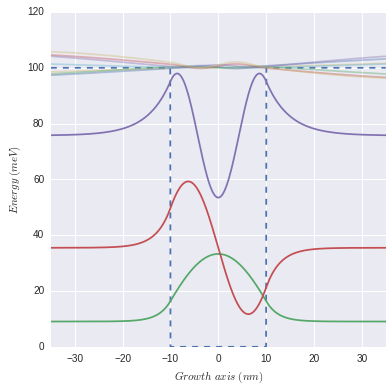

In [9]:
L = 20
vals, vecs = get_lower_egenvalues_and_vectors(get_H(L, N, xmax), 10)
h = (2*xmax/(N-1))
xnet = np.array([-xmax + h*j for j in range(N)])
V = V0 * np.ones((N, )) * erg_to_meV
V[(-L/2<=xnet) & (xnet<=L/2)]=0.
f = plt.figure(figsize=(6,6))
plt.plot(xnet, V, '--')
plt.plot(xnet, (vecs[:,:3]*350+vals[:3]))
plt.plot(xnet, (vecs[:,3:]*350+vals[3:]), alpha=0.4)
plt.xlim(-35, 35)
plt.ylabel('$Energy\ (meV)$')
plt.xlabel('$Growth\ axis\ (nm)$')

## Зависимость уровней энергии от ширины ямы
Здесь строится зависимость 10 наименьших значений спектра от ширины ямы. 

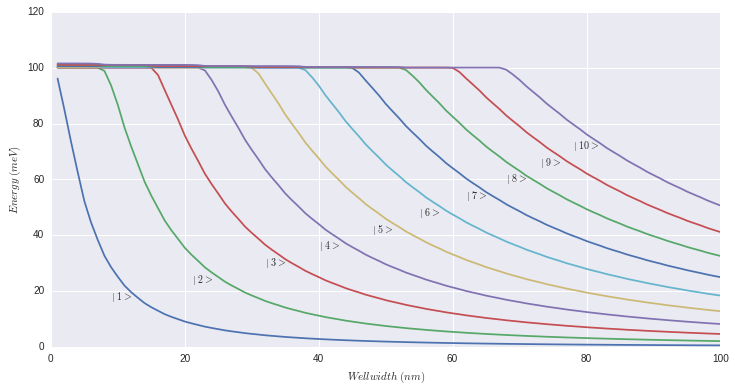

In [10]:
eigvals = []
for L in Lnet:
    eigvals.append(get_lower_egenvalues(get_H(L, N, xmax), 10))

f = plt.figure(figsize=(12,6))
plt.plot(Lnet,eigvals)
plt.ylabel('$Energy\ (meV)$')
plt.xlabel('$Well width\ (nm)$')
for j in range(10):
    y = 20 + 6*j
    plt.text(Lnet[np.argmin((np.array(eigvals)[:,j]-y)**2)]-3, y-3, '$|\ '+str(j+1)+'>$')

Два представленных графика сильно походят на рисунки 2.14-2.15 на стр. 34-35 в книге P.Harrison "Quantum wells, wires and dots". Поэтому скорее всего проведенные расчеты верны.